<a href="https://colab.research.google.com/github/juliuswiscmsba/NLP-Disaster-Tweets/blob/main/Disaster_Tweets_NB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, f1_score, accuracy_score
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.feature_extraction.text import CountVectorizer

In [5]:
from google.colab import files
train_clean = files.upload()
test_clean = files.upload()

Saving train_clean.csv to train_clean (1).csv


Saving test_clean.csv to test_clean (1).csv


In [6]:
train = pd.read_csv("train_clean.csv")
test = pd.read_csv("test_clean.csv")

In [7]:
#Vectorizer for NB
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(train['text'])
y = train['target']
test_X = vectorizer.transform(test['text'])

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [9]:
#train and evaluate models with different alpha values
alpha_values = np.arange(0.01, 10, 0.01)
accuracy_scores = []

for alpha in alpha_values:
    NB = MultinomialNB(alpha=alpha)
    NB.fit(X_train, y_train)
    accuracy_scores.append(metrics.accuracy_score(y_test, NB.predict(X_test)))

performance_NB = pd.DataFrame(columns=['alpha', 'accuracy'])
performance_NB['alpha'] = alpha_values
performance_NB['accuracy'] = accuracy_scores
performance_NB.head()

,alpha,accuracy
0,0.01,0.760070
1,0.02,0.763135
2,0.03,0.765324
3,0.04,0.767075
4,0.05,0.769264


In [10]:
#finds the best alpha value
best_index = performance_NB['accuracy'].idxmax()
performance_NB.iloc[best_index, :]

alpha       3.670000
accuracy    0.801664
Name: 366, dtype: float64

In [11]:
#Apply the best alpha
NB = MultinomialNB(alpha=3.67)
NB.fit(X_train, y_train)

MultinomialNB(alpha=3.67)

In [14]:
yhat = NB.predict(X_test)
print(classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.81      0.86      0.84      1338
           1       0.78      0.72      0.75       946

    accuracy                           0.80      2284
   macro avg       0.80      0.79      0.79      2284
weighted avg       0.80      0.80      0.80      2284



Text(51.0, 0.5, 'Real')

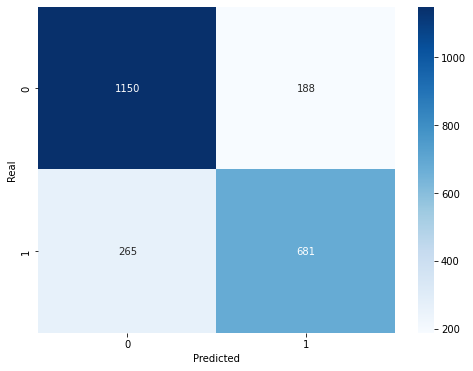

In [15]:
plt.figure(figsize = (8,6))

sns.heatmap(confusion_matrix(y_test,yhat), annot=True, fmt='', cmap='Blues')

plt.xlabel('Predicted')
plt.ylabel('Real')

In [17]:
test['target'] = NB.predict(test_X)
sub_nb = test[['id','target']].copy()
sub_nb.to_csv('submission_nb.csv', index = False)
files.download('submission_nb.csv')
#Result: 0.78823

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>